In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("")))))
from src.pre_process.V4.feature_add import FeatureAddition
from src.pre_process.V4.feature_duplicate import FeatureDuplication

In [16]:
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'
BASE_PATH2 = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\processed'
data = pd.read_csv(os.path.join(BASE_PATH2,'v9_fillna.csv'))
# near_apt = pd.read_csv(os.path.join(BASE_PATH,'nearest_apt_deposit.csv'))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

In [12]:
# v8 = pd.read_csv(os.path.join(BASE_PATH,'v8+subway_1+trade_vol+near_deposit.csv'))

---

## 확인

In [15]:
d1 = pd.read_csv('3483.csv')
d2 = pd.read_csv('3504.csv')
d3 = pd.read_csv('3654.csv')

In [17]:
v9 = pd.read_csv('v9_log.csv')

In [19]:
v9['deposit'] = np.expm1(v9['deposit'])

In [20]:
print(v9['deposit'].mean())

39308.21168309737


In [24]:
d5 = pd.DataFrame()
d5['index'] = d1['index']

In [48]:
d5['deposit']= (d1['deposit'] + d2['deposit']) / 2

In [49]:
d5.mean()

index      75085.500000
deposit    39252.200315
dtype: float64

In [50]:
d5

,index,deposit
0,0,23220.465726
1,1,7090.962065
2,2,5979.690964
3,3,6078.351467
4,4,6389.875701
...,...,...
150167,150167,38881.020974
150168,150168,43909.183094
150169,150169,45413.970518
150170,150170,38812.264046


In [54]:
d5.to_csv('final.csv')

In [23]:

mae_d2_v9 = mean_absolute_error(d1['deposit'], v9['deposit'])
print(mae_d2_v9)

591.7098744994471


In [4]:
print(d1['deposit'].mean())
print(d2['deposit'].mean())
print(d3['deposit'].mean())
print((d1['deposit'] - d2['deposit']).mean())

39147.14513313875
39357.2554977428
39262.106154423236
-210.1103646040492


In [9]:
from sklearn.metrics import mean_absolute_error
mae_d1_d2 = mean_absolute_error(d1['deposit'], d2['deposit'])
mae_d2_d3 = mean_absolute_error(d2['deposit'], d3['deposit'])
mae_d1_d3 = mean_absolute_error(d1['deposit'], d3['deposit'])
print(mae_d1_d2)
print(mae_d2_d3)
print(mae_d1_d3)

555.9645490880898
1072.419542198984
1021.9356753146889


In [6]:
d4 = pd.DataFrame()
d4['index'] = d1['index']

In [7]:
d4['deposit']= ((d2['deposit'] * 0.75) + (d3['deposit'] * 0.25))

In [8]:
d4

,index,deposit
0,0,23350.230911
1,1,7130.747067
2,2,5920.535725
3,3,5970.201693
4,4,6430.956542
...,...,...
150167,150167,39163.889968
150168,150168,43656.366001
150169,150169,44571.156443
150170,150170,38720.150330


In [12]:
d4.to_csv('v9_ensemble.csv',index=False)

In [10]:
mae_d1_d4 = mean_absolute_error(d1['deposit'], d4['deposit'])
print(d4['deposit'].mean())
print(mae_d1_d4)

39333.46816191291
528.1814471000981


In [44]:
d4['deposit']= (d1['deposit']+d2['deposit']) / 2

In [47]:
print(d4['deposit'].mean())

39355.02543500874


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


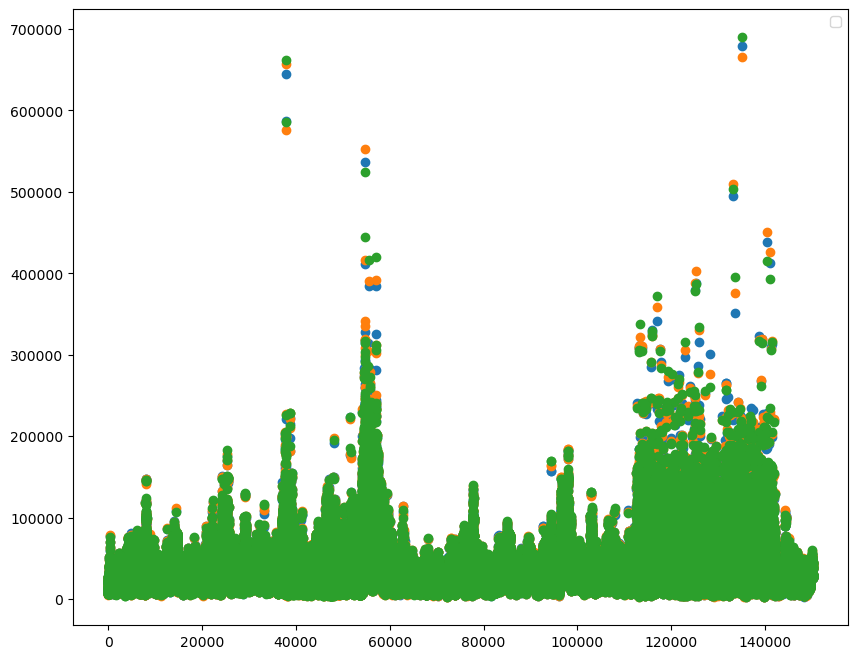

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(d1['index'],d1['deposit'])
plt.scatter(d2['index'],d2['deposit'])
plt.scatter(v9['index'],v9['deposit'])
plt.legend()
plt.show()

In [34]:
# 각 데이터프레임의 상위 30%만 추출
d1_top_30 = d1.iloc[:int(len(d1) * 0.3)]
d2_top_30 = d2.iloc[:int(len(d2) * 0.3)]
d3_top_30 = d3.iloc[:int(len(d3) * 0.3)]

# 상위 30%의 'deposit' 값의 평균 계산
mean_d1_top_30 = d1_top_30['deposit'].mean()
mean_d2_top_30 = d2_top_30['deposit'].mean()
mean_d3_top_30 = d3_top_30['deposit'].mean()

In [35]:
print(mean_d1_top_30)
print(mean_d2_top_30)
print(mean_d3_top_30)

34475.88950808671
34574.647153395425
34515.40996955903


## data

In [17]:
data.columns

Index(['contract_date_numeric', 'area_m2', 'floor', 'built_year', 'latitude',
       'longitude', 'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'nearest_park_distance', 'nearest_park_idx',
       'park_area', 'nearest_school_distance', 'nearest_school_idx',
       'nearest_subway_distance', 'nearest_subway_idx', 'park_count',
       'school_count', 'subway_count', '_type'],
      dtype='object')

In [18]:
data[['floor','age']] = data[['floor','age']].clip(lower=0)

In [7]:
data[['deposit','floor']].corr()

,deposit,floor
deposit,1.000000,0.132339
floor,0.132339,1.000000


In [19]:
data[['area_m2', 'floor', 'built_year', 'age','deposit',
       'area', 'grid_deposit',
       'recent_deposit', 'nearest_park_distance',
       'park_area', 'nearest_school_distance',
       'nearest_subway_distance', 'park_count',
       'school_count', 'subway_count',]] = np.log1p(data[['area_m2', 'floor', 'built_year', 'age','deposit',
       'area', 'grid_deposit',
       'recent_deposit', 'nearest_park_distance',
       'park_area', 'nearest_school_distance',
       'nearest_subway_distance', 'park_count',
       'school_count', 'subway_count',]])

In [20]:
data

,contract_date_numeric,area_m2,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,...,nearest_park_idx,park_area,nearest_school_distance,nearest_school_idx,nearest_subway_distance,nearest_subway_idx,park_count,school_count,subway_count,_type
0,20190625,4.454325,2.302585,7.610853,37.054314,127.045216,0.000000,False,False,9.741027,...,9759,8.268475,5.057013,6739,6.576404,12,2.302585,2.772589,0.693147,train
1,20200326,4.454325,3.044522,7.610853,37.054314,127.045216,0.693147,False,False,10.043293,...,9759,8.268475,5.057013,6739,6.576404,12,2.302585,2.772589,0.693147,train
2,20200328,4.454325,2.197225,7.610853,37.054314,127.045216,0.693147,False,False,10.043293,...,9759,8.268475,5.057013,6739,6.576404,12,2.302585,2.772589,0.693147,train
3,20190715,4.099995,0.693147,7.594381,36.964647,127.055847,3.526361,False,False,8.517393,...,9139,7.388328,5.373238,6535,8.268291,10,2.079442,1.386294,0.693147,train
4,20190412,4.107754,1.945910,7.598900,36.972390,127.084514,3.218876,False,False,7.496097,...,9201,8.290794,7.443950,6589,7.621041,10,0.693147,1.945910,0.693147,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,20240227,4.757978,2.890372,7.606387,37.528394,126.659398,2.708050,True,False,NaN,...,14160,9.101072,5.419447,9387,7.302526,293,2.302585,2.484907,1.609438,test
1951396,20240302,4.968937,1.609438,7.606387,37.528394,126.659398,2.708050,True,False,NaN,...,14160,9.101072,5.419447,9387,7.302526,293,2.302585,2.484907,1.609438,test
1951397,20240316,4.968937,2.639057,7.606387,37.528394,126.659398,2.708050,False,True,NaN,...,14160,9.101072,5.419447,9387,7.302526,293,2.302585,2.484907,1.609438,test
1951398,20240322,4.752974,1.098612,7.606387,37.528394,126.659398,2.708050,False,True,NaN,...,14160,9.101072,5.419447,9387,7.302526,293,2.302585,2.484907,1.609438,test


In [21]:
data.to_csv('v9_log.csv',index=False)

# data 확인

In [4]:
data

,contract_date_numeric,area_m2,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,...,nearest_park_idx,park_area,nearest_school_distance,nearest_school_idx,nearest_subway_distance,nearest_subway_idx,park_count,school_count,subway_count,_type
0,20190625,84.9981,9,2019,37.054314,127.045216,0,False,False,17000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
1,20200326,84.9981,20,2019,37.054314,127.045216,1,False,False,23000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
2,20200328,84.9981,8,2019,37.054314,127.045216,1,False,False,23000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
3,20190715,59.3400,1,1986,36.964647,127.055847,33,False,False,5000.0,...,9139,1616.0,214.559689,6535,3897.279708,10,7.0,3,1,train
4,20190412,59.8100,6,1995,36.972390,127.084514,24,False,False,1800.0,...,9201,3986.0,1708.489263,6589,2039.685349,10,1.0,6,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,20240227,115.5101,17,2010,37.528394,126.659398,14,True,False,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951396,20240302,142.8738,4,2010,37.528394,126.659398,14,True,False,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951397,20240316,142.8738,13,2010,37.528394,126.659398,14,False,True,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951398,20240322,114.9285,2,2010,37.528394,126.659398,14,False,True,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test


In [5]:
data.columns

Index(['contract_date_numeric', 'area_m2', 'floor', 'built_year', 'latitude',
       'longitude', 'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'nearest_park_distance', 'nearest_park_idx',
       'park_area', 'nearest_school_distance', 'nearest_school_idx',
       'nearest_subway_distance', 'nearest_subway_idx', 'park_count',
       'school_count', 'subway_count', '_type'],
      dtype='object')

In [7]:
data['nearest_apt_deposit'] = near_apt['nearest_apt_deposit']

In [10]:
data['recent_deposit'] = data['recent_deposit'].fillna(data['nearest_apt_deposit'])

In [11]:
data.isnull().sum()

contract_date_numeric           0
area_m2                         0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit                 34
nearest_park_distance           0
nearest_park_idx                0
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
nearest_subway_distance         0
nearest_subway_idx              0
park_count                     88
school_count                    0
subway_count                    0
_type                           0
nearest_apt_deposit            34
dtype: int64

In [13]:
data.columns

Index(['contract_date_numeric', 'area_m2', 'floor', 'built_year', 'latitude',
       'longitude', 'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'nearest_park_distance', 'nearest_park_idx',
       'park_area', 'nearest_school_distance', 'nearest_school_idx',
       'nearest_subway_distance', 'nearest_subway_idx', 'park_count',
       'school_count', 'subway_count', '_type', 'nearest_apt_deposit'],
      dtype='object')

In [14]:
v8.columns

Index(['apt_idx', 'area_m2', 'index', '_type', 'floor', 'built_year',
       'latitude', 'longitude', 'age', 'contract_0', 'contract_1', 'deposit',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'interest_rate', 'grid_id', 'nearest_park_distance',
       'nearest_park_idx', 'park_grid_id', 'park_area',
       'nearest_school_distance', 'nearest_school_idx', 'school_grid_id',
       'nearest_subway_distance', 'nearest_subway_idx', 'subway_grid_id',
       'park_count', 'school_count', 'subway_count', 'contract_timestamp',
       'subway_1', 'monthly_trade_volume', 'cumulative_trade_volume',
       'nearest_apt_deposit'],
      dtype='object')

In [16]:
data[['subway_1','monthly_trade_volume','cumulative_trade_volume']] = v8[[
    'subway_1', 'monthly_trade_volume', 'cumulative_trade_volume'
]]

In [18]:
data[['subway_1','monthly_trade_volume','cumulative_trade_volume','deposit']].corr()

,subway_1,monthly_trade_volume,cumulative_trade_volume,deposit
subway_1,1.000000,0.019458,0.056942,0.364705
monthly_trade_volume,0.019458,1.000000,0.436069,-0.054105
cumulative_trade_volume,0.056942,0.436069,1.000000,-0.022011
deposit,0.364705,-0.054105,-0.022011,1.000000


In [22]:
data.columns

Index(['contract_date_numeric', 'area_m2', 'floor', 'built_year', 'latitude',
       'longitude', 'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'nearest_park_distance', 'nearest_park_idx',
       'park_area', 'nearest_school_distance', 'nearest_school_idx',
       'nearest_subway_distance', 'nearest_subway_idx', 'park_count',
       'school_count', 'subway_count', '_type', 'subway_1',
       'monthly_trade_volume', 'cumulative_trade_volume'],
      dtype='object')

In [21]:
data.drop(columns='nearest_apt_deposit',inplace=True)

In [ ]:
dta

In [23]:
data.to_csv('v12_drop.csv',index=False)

---

# 모델링

In [14]:
train_data = data[data['_type'] == 'train']
test_data = data[data['_type'] == 'test']

In [21]:
column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric', 
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1', 
    'deposit', 
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
test_column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric',
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1',  
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
train_df = train_data[column_needed]
test_df = test_data[test_column_needed]

---

In [22]:
X_train = train_df.drop(columns=['deposit'])
y_train = train_df['deposit']
X_test = test_df.copy()

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# # 학습에 사용할 특징 열
# feature_columns = [col for col in data.columns if col not in ['deposit', '_type', 'index']]
# 학습 및 테스트 데이터 준비
X_train = train_df.drop(columns=['deposit'])
y_train = train_df['deposit']
X_test = test_df.copy()
# 학습 데이터를 검증용으로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2,
                                                                          random_state=42)
# XGBoost를 위한 DMatrix 생성
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)
dtest = xgb.DMatrix(X_test)
# XGBoost 파라미터 설정
params = {
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=50, evals=evals, verbose_eval=100)
# 테스트 세트에 대한 예측
y_pred = model.predict(dtest)

[0]	train-mae:16477.66290	eval-mae:16479.61304
[100]	train-mae:4201.21827	eval-mae:4198.05642
[200]	train-mae:4029.29052	eval-mae:4033.67618
[300]	train-mae:3957.98301	eval-mae:3966.89647
[400]	train-mae:3909.12903	eval-mae:3921.65214
[500]	train-mae:3871.04855	eval-mae:3887.91143
[600]	train-mae:3843.37477	eval-mae:3863.41660
[700]	train-mae:3821.52749	eval-mae:3844.62054
[800]	train-mae:3802.82133	eval-mae:3828.75708
[900]	train-mae:3785.91311	eval-mae:3814.40395
[1000]	train-mae:3769.22765	eval-mae:3800.02820
[1100]	train-mae:3759.00915	eval-mae:3791.74209
[1200]	train-mae:3747.14283	eval-mae:3782.39039
[1300]	train-mae:3737.73426	eval-mae:3775.08518
[1400]	train-mae:3729.12826	eval-mae:3768.54589
[1500]	train-mae:3720.20564	eval-mae:3761.84046
[1600]	train-mae:3712.84681	eval-mae:3756.45755
[1700]	train-mae:3704.16615	eval-mae:3750.37946
[1800]	train-mae:3696.62385	eval-mae:3745.05480
[1900]	train-mae:3690.34975	eval-mae:3740.86550
[2000]	train-mae:3683.77581	eval-mae:3736.36483
[2

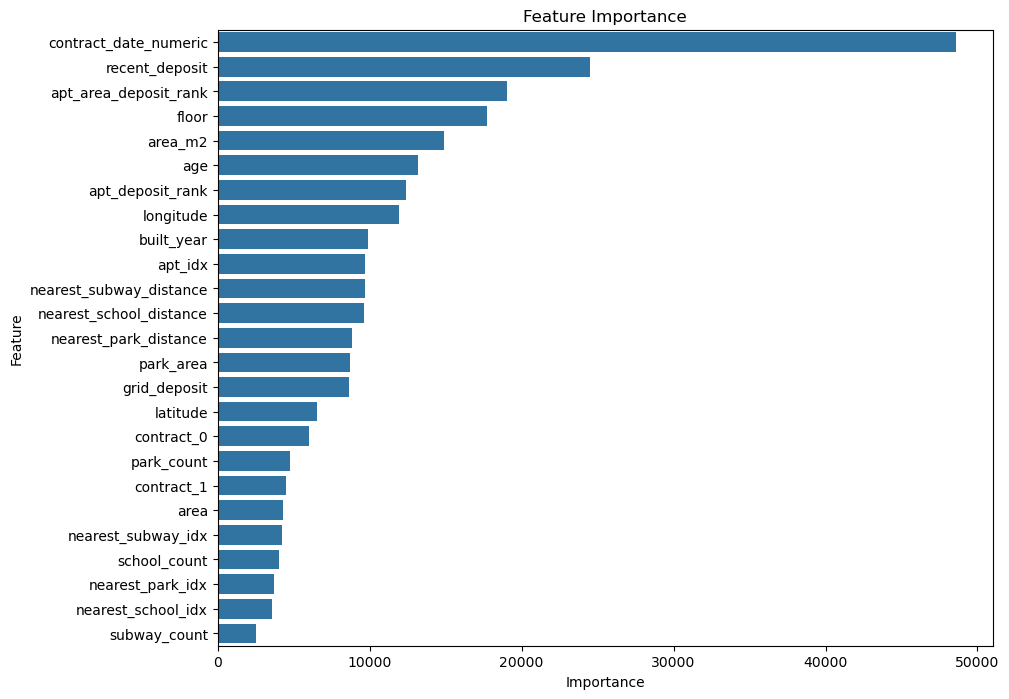

In [21]:
#Feature Importance
# 피처 중요도 추출
feature_importance = model.get_fscore()
# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [22]:
y_pred

array([23174.48 ,  7080.909,  6007.085, ..., 45237.953, 38058.59 ,
       38525.37 ], dtype=float32)

In [23]:
sample_submission['deposit'] = y_pred
sample_submission

,index,deposit
0,0,23174.480469
1,1,7080.909180
2,2,6007.084961
3,3,6111.806152
4,4,6479.200684
...,...,...
150167,150167,37639.843750
150168,150168,44034.597656
150169,150169,45237.953125
150170,150170,38058.589844


In [24]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39294.285156
std,43351.06665,24372.753906
min,0.00000,2835.812988
25%,37542.75000,23355.395020
50%,75085.50000,34007.021484
75%,112628.25000,48619.085938
max,150171.00000,534889.812500


In [25]:
# sample_submission.to_csv('v8_xgb_5000.csv', index=False)

---